# Sample KRR Example

Sample notebook to explore how KRR works for points on a 2d grid.

In [37]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.kernel_ridge import KernelRidge

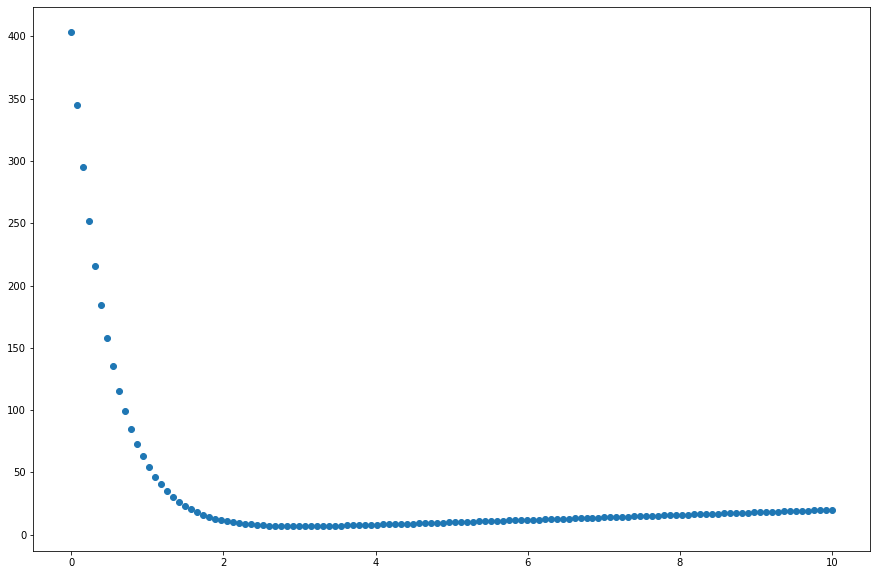

In [38]:
# Generate points by sampling from function

def func(x, a=-2, c=-3):
  return math.exp(a * (x + c)) - a * x

X = np.linspace(0, 10, 128)
y = np.array([func(x) for x in X])

f, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(X, y)
plt.show()

Clearly not enough sampling at lower values of $X$ so lets find the minima and remove 20% of the points from the right and move them to the left:

In [43]:
def sample(n=128):
    X = np.linspace(0, 10, 128)
    y = np.array([func(x) for x in X])  
    dydX = np.diff(y)/np.diff(X)
    minimum = X[np.argmin(abs(dydX))]
    right = [x for x in X if x >= minimum]
    left = [x for x in X if x < minimum]
    # Remove 20% of right
    n = len(right)
    right = random.sample(right, int(n*0.8))
    more_left = np.linspace(0, minimum, int(n*0.2))
    left = [*left, *more_left]
    X = [*right, *left]
    y = [func(x) for x in X]

    return np.array(X), np.array(y)

In [44]:
X, y = sample(n=128)

72 56


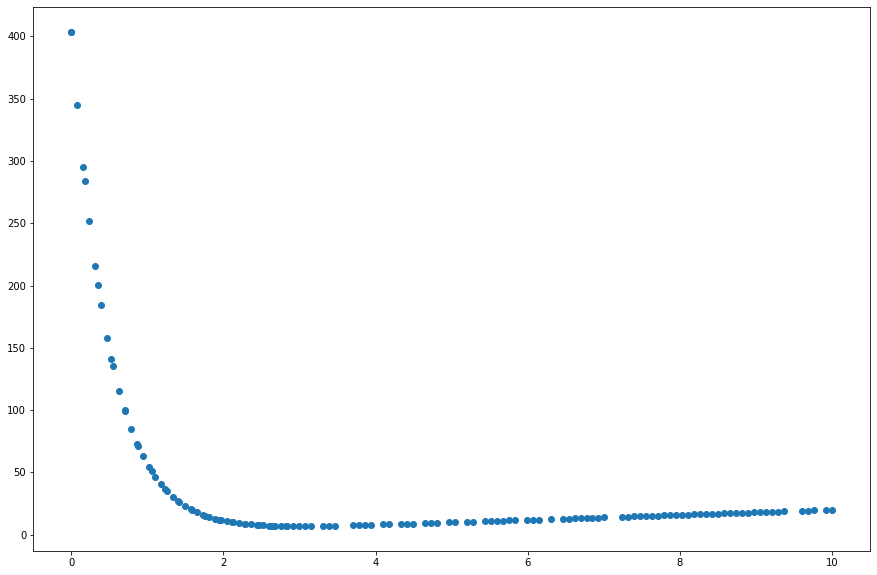

In [45]:
f, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(X, y)
plt.show()

In [53]:
krr = KernelRidge(alpha=1.0)
krr.fit(X.reshape(-1, 1), y.ravel())

X_test, y_test = sample(n=128)
y_pred = krr.predict(X_test.reshape(-1, 1))

f, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(X_test, y_test, color="green", label='Test')
ax.scatter(X_test, y_pred, color="red", label='Pred')
plt.show()

KernelRidge(alpha=1.0, degree=2, gamma=1, kernel='polynomial')

In [54]:
krr = KernelRidge(alpha=1.0, kernel='polynomial', gamma=1, degree=2)
krr.fit(X.reshape(-1, 1), y.ravel())

X_test, y_test = sample(n=128)
y_pred = krr.predict(X_test.reshape(-1, 1))

f, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(X_test, y_test, color="green", label='Test')
ax.scatter(X_test, y_pred, color="red", label='Pred')
plt.show()

72 56


72 56


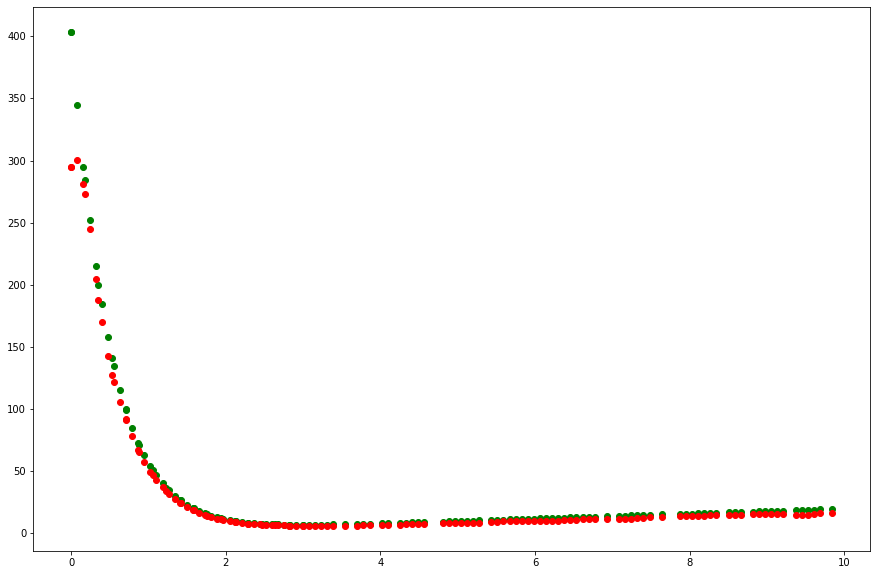

In [64]:
krr = KernelRidge(alpha=1.0, kernel='rbf', gamma=10, degree=1)
krr.fit(X.reshape(-1, 1), y.ravel())

X_test, y_test = sample(n=128)
y_pred = krr.predict(X_test.reshape(-1, 1))

f, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(X_test, y_test, color="green", label='Test')
ax.scatter(X_test, y_pred, color="red", label='Pred')
plt.show()

72 56


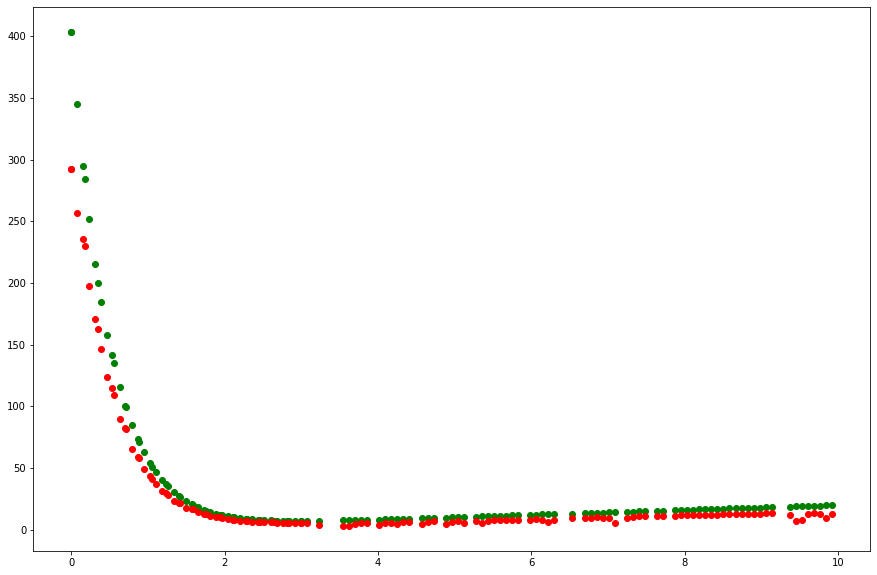

In [65]:
krr = KernelRidge(alpha=1.0, kernel='laplacian', gamma=10, degree=1)
krr.fit(X.reshape(-1, 1), y.ravel())

X_test, y_test = sample(n=128)
y_pred = krr.predict(X_test.reshape(-1, 1))

f, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(X_test, y_test, color="green", label='Test')
ax.scatter(X_test, y_pred, color="red", label='Pred')
plt.show()